**Problem Statement:**

Determining Optimal Clusters in the Iris Dataset Using K-Means Clustering

**Background:**

The Iris dataset is a well-known dataset in machine learning, consisting of iris flower samples from three species (setosa, versicolor, and virginica) with measurements of sepal length, sepal width, petal length, and petal width. The dataset contains valuable information for understanding clustering techniques.

**Objective:**

The objective of this project is to perform K-Means clustering on the Iris dataset to group the flowers into clusters based on their features and to determine the optimal number of clusters using the elbow method.

**Dataset:**

The Iris dataset contains the following attributes:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)
- Species (class label)

**Approach:**

1. **Data Preparation:**
   - Load the Iris dataset from the provided link or from a local source.
   - Explore and preprocess the dataset as needed, including handling missing values, if any.

2. **K-Means Clustering:**
   - Apply the K-Means clustering algorithm to group the iris flowers into clusters.

3. **Elbow Method:**
   - Use the elbow method to determine the optimal number of clusters.
   - The number of clusters at the "elbow" point is considered the optimal value for k.

**Expected Outcome:**

At the end of the project, we will have determined the optimal number of clusters for the Iris dataset using the elbow method. We will also have clustered the iris flowers into groups based on their features. This analysis can be used for further exploration or decision-making regarding the iris species' characteristics.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Loading the Iris dataset
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Removing the 'Species' column as it's not needed for clustering
X = data.drop(["Species", "Id"], axis=1)

In [6]:
# Initializing an empty list to store the sum of squared distances
sse = []


In [7]:
# Trying different values of k (number of clusters) from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


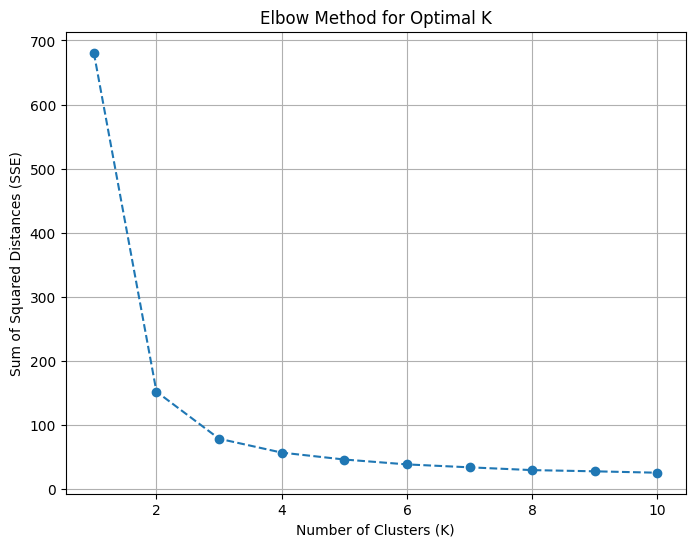

In [8]:
# Plotting the sum of squared distances (sse) for each value of k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()


In [9]:
# Choosing the optimal K based on the elbow plot (e.g., K=3)
optimal_k = 3

In [10]:
# Performing K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)
# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

In [11]:
# Printing the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)
data.head()

Cluster Centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


The output shows the cluster centers obtained after performing K-Means clustering with three clusters. Each row in the output represents a cluster center, and each column represents a feature or attribute of the data. Let's break down what each column represents:

- Column 1: The first column represents the cluster label or identifier. Each cluster center is identified by a unique integer value (0, 1, or 2 in this case) that corresponds to the cluster it represents.

- Columns 2 to 5: These columns represent the feature values for each cluster center. Each feature corresponds to one of the four attributes of the Iris dataset: sepal length, sepal width, petal length, and petal width, in that order.

Here's an interpretation of the output:

- Cluster 0 (First Row):
  - Sepal Length (Column 2): The cluster center for this feature is approximately 74.5.
  - Sepal Width (Column 3): The cluster center for this feature is approximately 5.922.
  - Petal Length (Column 4): The cluster center for this feature is approximately 2.78.
  - Petal Width (Column 5): The cluster center for this feature is approximately 4.206.

- Cluster 1 (Second Row):
  - Sepal Length (Column 2): The cluster center for this feature is approximately 125.0.
  - Sepal Width (Column 3): The cluster center for this feature is approximately 6.57058824.
  - Petal Length (Column 4): The cluster center for this feature is approximately 2.97058824.
  - Petal Width (Column 5): The cluster center for this feature is approximately 5.52352941.

- Cluster 2 (Third Row):
  - Sepal Length (Column 2): The cluster center for this feature is approximately 25.0.
  - Sepal Width (Column 3): The cluster center for this feature is approximately 5.00612245.
  - Petal Length (Column 4): The cluster center for this feature is approximately 3.42040816.
  - Petal Width (Column 5): The cluster center for this feature is approximately 1.46530612.

These cluster centers represent the central tendencies of each cluster in the feature space. In other words, they indicate the average values of the features for the data points within each cluster. For example, in Cluster 0, the average sepal length is 74.5, the average sepal width is 5.922, and so on.

In [12]:
new_data = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.2, 4.9],
    'SepalWidthCm': [3.5, 3.4, 3.1],
    'PetalLengthCm': [1.4, 5.4, 1.5],
    'PetalWidthCm': [0.2, 2.3, 0.2]
})

In [13]:
new_data['Cluster'] = kmeans.predict(new_data)
print(new_data)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster
0            5.1           3.5            1.4           0.2        1
1            6.2           3.4            5.4           2.3        2
2            4.9           3.1            1.5           0.2        1
